# Pandas 연습문제 

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# 숨기기

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  adult & sex  891 non-null    object  
dtypes: bool(2), category(2), float64(2), int64(4), object(6)
memory usage: 87.6+ KB


a. 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만드시오. 
category1 카테고리는 다음과 같이 정의됨
1) 20살이 넘으면 성별을 그대로 사용한다.
2) 20살 미만이면 성별에 관계없이 “child”라고 한다.


In [61]:
# 조건에 맞는 데이터들의 인덱스를 이용 
# # who컬럼의 값을 변경하고자 한다.

# f = titanic.age[titanic.age < 20].index
# f = np.array(f,int)
# f

In [60]:
titanic.sex.value_counts()
titanic.age[titanic.age < 20].count()  # 20세 미만은 164명으로 확인된다. 

164

In [54]:
# 성인의 성별을 그대로 유지한채로 164명의 child가 생기면 된다. 
titanic["adult & sex"] = titanic["sex"]

for i in titanic.index:
    if titanic.age[i] < 20 :
        titanic["adult & sex"][i] = "child"

titanic["adult & sex"].value_counts()

male      488
female    239
child     164
Name: adult & sex, dtype: int64

In [66]:
titanic[titanic.sex.values == titanic["adult & sex"].values]  # 727 row로 데이터가 잘 들어갔느지 확인!
                                                              # titanic의 총 row는 891    891 - 164 child = 727 male or female
# titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone adult & sex  
0      man        True  NaN  Southampton    no  False        male  
1    woman       False    C    Cherbourg   yes  False      female  
2    woman       False  NaN  Southampton   yes   True      female  
3    woman       False    C  Southampton   yes  False      female  
4      man        True  NaN  Southampton    no   True        male  
..     ...         ...  ...          ...   ...    ...         ...  
885  woman       False  NaN   Queenstown    no  False      female  
886    man        True  NaN  Southampton    no   True        male  
888  woman       False  NaN  Southampton    no  False      female  
889    man        True    C    Cherbourg   yes   True        male  
890    man        True  NaN   Queenstown    no   True        male  

[727 rows x 16 columns]

b. 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이
값이 되도록 titanic 데이터프레임을 고치시오

In [77]:
# round(titanic.age.mean(),0)
int(titanic.age.mean())  # 평균나이 29살로 결측치 처리해준다.

29

In [78]:
# titanic.age.isna().sum() # 나이를 기입하지 않은사람이 177명이나 된다
titanic.age.fillna(int(titanic.age.mean()), inplace=True)

In [80]:
titanic.age.isna().sum()

0

c. 성별, 선실(class)별, 출발지(embark_town)별 생존율을 구하시오.

In [87]:
# 성별은 child도 그대로 써야하나?
res = titanic.groupby(["class","sex","embark_town"])[["survived"]].count()
res

survived
class  sex    embark_town          
First  female Cherbourg          43
              Queenstown          1
              Southampton        48
       male   Cherbourg          42
              Queenstown          1
              Southampton        79
Second female Cherbourg           7
              Queenstown          2
              Southampton        67
       male   Cherbourg          10
              Queenstown          1
              Southampton        97
Third  female Cherbourg          23
              Queenstown         33
              Southampton        88
       male   Cherbourg          43
              Queenstown         39
              Southampton       265

In [88]:

# 요기에서 1. 0 을 어떻게 
res_sur = titanic.groupby(["class","sex","embark_town"])[["survived"]].count()
res_sur

KeyError: 'Columns not found: False'

In [ ]:
res = tips.groupby(['sex','smoker','time'])[['tip_pct']].mean()

# 숨기기 끝

In [ ]:
# 이후 부터 작성

In [90]:
import seaborn as sns 
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

Q1

In [91]:
# 1-a # 종별 기초통계량이므로 그룹바이
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [92]:
iris.groupby('species').agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

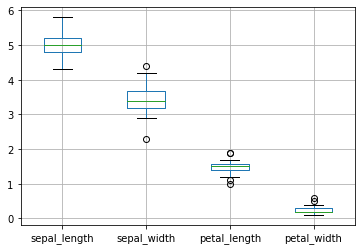

In [96]:
# 1-b 이상치 제거
iris[iris.species == 'setosa'].boxplot();

In [97]:
# s를 굳이 변수로 준이유는 s를 입력으로 받아서. 특정 품종의 피쳐를 받아서 계산기 만들기 위함
# 계산기는 이상치를 제거하고 평균과 표준편차, 이상치 개수를 돌려줘
s = iris[iris.species == 'setosa']['sepal_width']
# 퍼센타일 말고, 퀀타일 오오오오
q1, q3= s.quantile(0.25), s.quantile(0.75) 
iqr = q3-q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [98]:
s.mean(), s.std()

(3.428000000000001, 0.3790643690962886)

In [99]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
s[(s < lower_limit) | (s > upper_limit)] = np.nan
#결측치로 바꾸고 다시 평균 구하기. 표준편차
s.mean(), s.std(), s.isna().sum()

(3.4312500000000004, 0.32034306743094015, 2)

In [100]:
# 이제부터는 문제를 푸는 방법
# 일반화 시켜서 함수를 만드는 방법 
# 작전이 뭐냐 두가지로 나눌것.  # 혹시 함수정의 프로그램 순서?
# 어떻게든 반복문 써써 코드의 중복을 제거해야되.

In [101]:
# 특정 품종의 피쳐를 받아서 이상치를 제거하고 평균과 표준편차, 이상치 개수를 돌려는 함수!
def get_newstats(s):
    q1, q3= s.quantile(0.25), s.quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan
    return s.mean(), s.std(), s.isna().sum()

In [ ]:
# get_newstats('setosa')

In [103]:
# 반복문 대찬 와.. 
for species in iris.species.unique():   #['setosa, 'versiclolr', 'verginica']
    for column in iris.columns[:-1]:
        s = iris[iris.species == species][column]                     # .column 으로는 안되고 [] 브라켓 써줘야 되.
        new_mean, new_std, outlier = get_newstats(s)        
        print(species, column, new_mean, new_std, outlier)

setosa sepal_length 5.005999999999999 0.3524896872134512 0
setosa sepal_width 3.4312500000000004 0.32034306743094015 2
setosa petal_length 1.4608695652173913 0.12906201931985212 4
setosa petal_width 0.23333333333333328 0.08588298157855664 2
versicolor sepal_length 5.936 0.5161711470638635 0
versicolor sepal_width 2.7700000000000005 0.3137983233784114 0
versicolor petal_length 4.285714285714285 0.4377975178854565 1
versicolor petal_width 1.3259999999999998 0.197752680004544 0
virginica sepal_length 6.6224489795918355 0.593459246748267 1
virginica sepal_width 2.95531914893617 0.26027452951125174 3
virginica petal_length 5.552 0.5518946956639835 0
virginica petal_width 2.026 0.27465005563666733 0


In [114]:
line = []
for species in iris.species.unique():   #['setosa, 'versiclolr', 'verginica']
    for column in iris.columns[:-1]:
        s = iris[iris.species == species][column]
        old_mean, old_std = s.mean(), s.std()                
        new_mean, new_std, outlier = get_newstats(s)      
        line.append([species, column, round(old_mean,3), round(old_std,4), 
                     outlier, new_mean, new_std])
df = pd.DataFrame(line, columns=['species', 'column','old_mean', 'old_std', 'outlier갯수', 'new_mean', 'new_std'])
df.set_index(['species','column'], inplace=True)
df

old_mean  old_std  outlier갯수  new_mean   new_std
species    column                                                        
setosa     sepal_length     5.006   0.3525          0  5.006000  0.352490
           sepal_width      3.428   0.3791          2  3.431250  0.320343
           petal_length     1.462   0.1737          4  1.460870  0.129062
           petal_width      0.246   0.1054          2  0.233333  0.085883
versicolor sepal_length     5.936   0.5162          0  5.936000  0.516171
           sepal_width      2.770   0.3138          0  2.770000  0.313798
           petal_length     4.260   0.4699          1  4.285714  0.437798
           petal_width      1.326   0.1978          0  1.326000  0.197753
virginica  sepal_length     6.588   0.6359          1  6.622449  0.593459
           sepal_width      2.974   0.3225          3  2.955319  0.260275
           petal_length     5.552   0.5519          0  5.552000  0.551895
           petal_width      2.026   0.2747          0  2.026000  0.274650

In [ ]:
# 올드와 뉴가 비교가 안되서 코드를 한번 더 개선 함
# 소숫점 자리 수 를 좀 제한 하고 싶을 때 . 

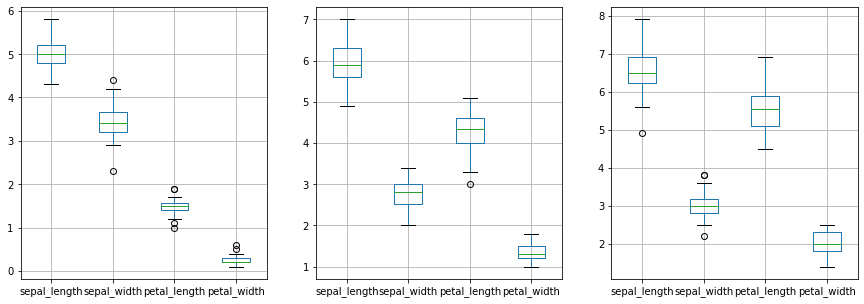

In [116]:
plt.figure(figsize= (15,5))
plt.subplot(131)  # 131은 행의갯수, 열의 갯수, 몇번째 1줄에 3개의 컬럼 있는놈
iris[iris.species == 'setosa'].boxplot()
plt.subplot(1,3,2)  # 행의 갯수 열의 갯수 몇번째
iris[iris.species == 'versicolor'].boxplot()
plt.subplot(133)  # 행의 갯수 열의 갯수 몇번째
iris[iris.species == 'virginica'].boxplot()
plt.show()

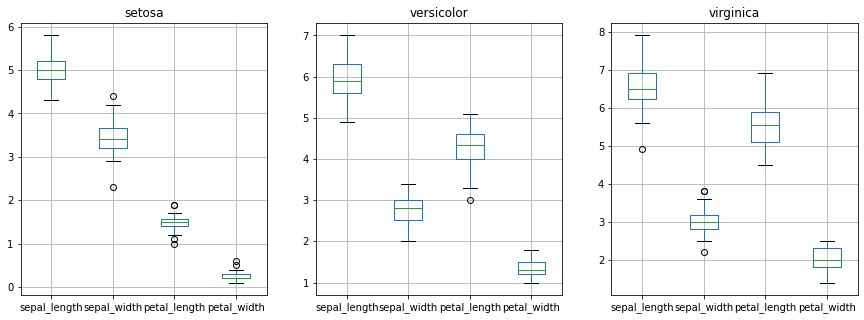

In [118]:
# 반복문 이용해 줄여봐.  # enumerate. # in zip 쓰는 버전 연구
plt.figure(figsize= (15,5))

for i, species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    plt.title(species)
    iris[iris.species == species].boxplot()
plt.show()

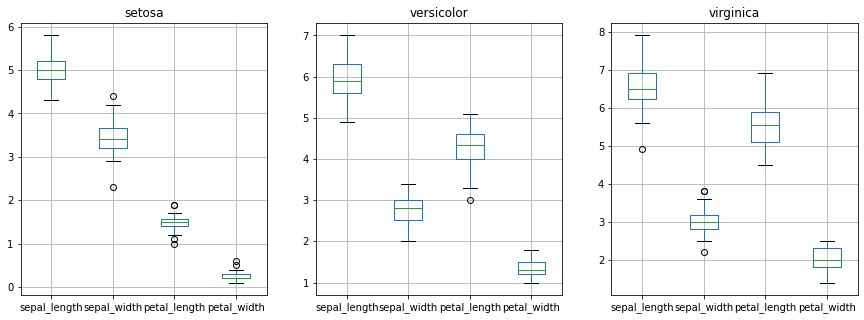

In [148]:
# 용재꺼 줍줍 # 용재 천재
plt.figure(figsize= (15,5))

for i, species in zip (range(1,4), iris.species.unique()):
    plt.subplot(1,3,i)
    plt.title(species)
    iris[iris.species == species].boxplot()
plt.show()

# 여기까지 1번

# Q2 Titanic

In [119]:
titanic.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

In [124]:
# 2-a 
# 아래 방식의 람다 x 는 컬럼이야 
# 람다가 컬럼이 되는지 시리즈가 되어 엘리먼트가 되는지 구분해야  # x.sex 풀어야!!
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age > 20 else 'child', axis=1)
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone category1  
886    man        True  NaN  Southampton    no   True      male  
887  woman       False    B  Southampton   yes   True     child  
888  woman       False  NaN  Southampton    no  False     child  
889    man        True    C    Cherbourg   yes   True      male  
890    man        True  NaN   Queenstown    no   True      male

In [126]:
# 2 -b
titanic.age = titanic.age.fillna(titanic.age.mean())
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age > 20 else 'child', axis=1)
titanic.tail()

survived  pclass     sex        age  sibsp  parch   fare embarked  \
886         0       2    male  27.000000      0      0  13.00        S   
887         1       1  female  19.000000      0      0  30.00        S   
888         0       3  female  29.699118      1      2  23.45        S   
889         1       1    male  26.000000      0      0  30.00        C   
890         0       3    male  32.000000      0      0   7.75        Q   

      class    who  adult_male deck  embark_town alive  alone category1  
886  Second    man        True  NaN  Southampton    no   True      male  
887   First  woman       False    B  Southampton   yes   True     child  
888   Third  woman       False  NaN  Southampton    no  False    female  
889   First    man        True    C    Cherbourg   yes   True      male  
890   Third    man        True  NaN   Queenstown    no   True      male

In [127]:
titanic.shape

(891, 16)

In [128]:
# 2-c # 성별선신별출발지별 생존율 #우아.서바이브드 의 민이 생존율인데 ..ㄷㄷ
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [129]:
titanic.groupby('embarked')['survived'].mean()

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

In [130]:
titanic.groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [ ]:
# d나 e 는 데사스쿨 4.4. 실수 값을 카테고리 밧으로 변환 참고

# Q3. MPG

In [131]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [134]:
# 3-a
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  hp_per_cc  
0          70    usa  chevrolet chevelle malibu   0.423453  
1          70    usa          buick skylark 320   0.471429  
2          70    usa         plymouth satellite   0.471698  
3          70    usa              amc rebel sst   0.493421  
4          70    usa                ford torino   0.463576

In [137]:
# 3-b
name = 'chevrolet chevelle malibu'
manu = name.split()[0]
manu	

'chevrolet'

In [138]:
name.split()

['chevrolet', 'chevelle', 'malibu']

In [139]:
len = len(manu)
len

9

In [140]:
name[len+1:]
# 이생각도 가능 벗 추천 노노

'chevelle malibu'

In [141]:
name.split()[1:]

['chevelle', 'malibu']

# 반드시 기억해야 할 구문

In [142]:
' '.join(name.split()[1:])  # ' ' 사이의 내용이 마치 프린트의 세퍼레이터 처럼 작동

'chevelle malibu'

In [143]:
mpg['manu'] = mpg.name.apply(lambda x:x.split()[0])
mpg['model'] = mpg.name.apply(lambda x: ' '.join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  hp_per_cc       manu            model  
0          70    usa   0.423453  chevrolet  chevelle malibu  
1          70    usa   0.471429      buick      skylark 320  
2          70    usa   0.471698   plymouth        satellite  
3          70    usa   0.493421        amc        rebel sst  
4          70    usa   0.463576       ford           torino

In [144]:
# map . apply rambda, 파이써닉. in zip 등 파이썬 기초문법으로 돌아가야

In [145]:
# 3-c 실린더 그룹바이 연비의 평균 mpg의 평균
mpg.groupby('cylinders')['mpg'].mean()


cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

In [146]:
# 3-d 생산지 오리진 별 배기량 대비 마력의 평균
mpg.groupby('origin')['hp_per_cc'].mean()

origin
europe    0.740005
japan     0.789485
usa       0.512063
Name: hp_per_cc, dtype: float64

In [150]:
#
#
#
# 이 문제의 하이라이트 이것을 위해
# 3 - e

mpg.groupby('manu')['model'].count()

manu
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: model, dtype: int64

In [156]:
s = mpg.manu.value_counts()  # 컬럼까지 가서 밸류카운트 # sorting이되서 시리즈로 결과가 나와. 
s[s >= 5]                    # 시리즈를 조건으로 찾기

ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
mazda         10
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
vw             6
renault        5
Name: manu, dtype: int64

In [159]:
# type(s[s >= 5])
big_manu = s[s >= 5].index   # 시리즈에서는 인덱스는 메소드가 아니라 어트리뷰트 속성값이기에 다음처럼
big_manu


Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat', 'peugeot', 'audi', 'volvo', 'chrysler', 'vw',
       'renault'],
      dtype='object')

In [160]:
'ford' in big_manu

True

In [161]:
# 전체 데이터 중에서 모델이 5개 이상인 제조사를 filtering
big_mpg = mpg[mpg.manu.isin(big_manu)]
mpg.shape, big_mpg.shape

((398, 11), (367, 11))

In [163]:
# 큰제조사의 연비 # 소팅도 해야 순위까지 보지
big_mpg.groupby('manu')['mpg'].mean().sort_values(ascending=False).head()

manu
vw         39.016667
honda      33.761538
renault    32.880000
datsun     31.113043
mazda      30.860000
Name: mpg, dtype: float64

In [164]:
# 어떻게 된게 아는차가 혼다 밖에 없니. 

# 복잡한 자료 구조에서 데이터 구하기

q1

In [177]:
# 도로명주소 API에서 '산굼부리'로 검색한 결과 
# # 자료구조는 딕셔너리로 보이고 그안 에 딕셔너리등 복잡
result = {'results': {'common': {'errorMessage': '정상',
    'countPerPage': '10',
    'totalCount': '1',
    'errorCode': '0',
    'currentPage': '1'},
    'juso': [{'detBdNmList': '',
    'engAddr': '768, Bijarim-ro, Jocheon-eup, Jeju-si, Jeju-do',
    'rn': '비자림로',
    'emdNm': '조천읍',
    'zipNo': '63346',
    'roadAddrPart2': '',
    'emdNo': '02',
    'sggNm': '제주시',
    'jibunAddr': '제주특별자치도 제주시 조천읍 교래리 342-2 산굼부리',
    'siNm': '제주특별자치도',
    'roadAddrPart1': '제주특별자치도 제주시 조천읍 비자림로 768',
    'bdNm': '산굼부리',
    'admCd': '5011025929',
    'udrtYn': '0',
    'lnbrMnnm': '342',
    'roadAddr': '제주특별자치도 제주시 조천읍 비자림로 768',
    'lnbrSlno': '2',
    'buldMnnm': '768',
    'bdKdcd': '0',
    'liNm': '교래리',
    'rnMgtSn': '501103349079',
    'mtYn': '0',
    'bdMgtSn': '5011025929003420005071420',
    'buldSlno': '0'}]}}

In [180]:
# 'roadAddrPart1': '제주특별자치도 제주시 조천읍 비자림로 768' 꺼내는 코드 작성
result.keys()

dict_keys(['results'])

In [182]:
# 딕셔너리에서 key에따른 값 얻기
result['results'].keys()

dict_keys(['common', 'juso'])

In [183]:
type(result['results']['juso'])

list

In [184]:
result['results']['juso'][0]

{'detBdNmList': '',
 'engAddr': '768, Bijarim-ro, Jocheon-eup, Jeju-si, Jeju-do',
 'rn': '비자림로',
 'emdNm': '조천읍',
 'zipNo': '63346',
 'roadAddrPart2': '',
 'emdNo': '02',
 'sggNm': '제주시',
 'jibunAddr': '제주특별자치도 제주시 조천읍 교래리 342-2 산굼부리',
 'siNm': '제주특별자치도',
 'roadAddrPart1': '제주특별자치도 제주시 조천읍 비자림로 768',
 'bdNm': '산굼부리',
 'admCd': '5011025929',
 'udrtYn': '0',
 'lnbrMnnm': '342',
 'roadAddr': '제주특별자치도 제주시 조천읍 비자림로 768',
 'lnbrSlno': '2',
 'buldMnnm': '768',
 'bdKdcd': '0',
 'liNm': '교래리',
 'rnMgtSn': '501103349079',
 'mtYn': '0',
 'bdMgtSn': '5011025929003420005071420',
 'buldSlno': '0'}

In [185]:
result['results']['juso'][0]['roadAddr']

'제주특별자치도 제주시 조천읍 비자림로 768'

q2 Q2) 아래의 결과에서 x와 y의 값을 가져오는 코드를 작성하세요.

In [188]:
# 카카오 API의 위도 경도 데이터 x, y 값 찾기 
result = {'documents': [{'address': {'address_name': '강원 강릉시 저동 94',
    'b_code': '4215013700',
    'h_code': '4215066500',
    'main_address_no': '94',
    'mountain_yn': 'N',
    'region_1depth_name': '강원',
    'region_2depth_name': '강릉시',
    'region_3depth_h_name': '경포동',
    'region_3depth_name': '저동',
    'sub_address_no': '',
    'x': '128.896538649542',
    'y': '37.7955687639648'},
   'address_name': '강원 강릉시 경포로 365',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '강원 강릉시 경포로 365',
    'building_name': '경포대',
    'main_building_no': '365',
    'region_1depth_name': '강원',
    'region_2depth_name': '강릉시',
    'region_3depth_name': '저동',
    'road_name': '경포로',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '128.896538649542',
    'y': '37.7955687639648',
    'zone_no': '25461'},
   'x': '128.896538649542',
   'y': '37.7955687639648'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [191]:
result.keys()

dict_keys(['documents', 'meta'])

In [195]:
result['documents']

[{'address': {'address_name': '강원 강릉시 저동 94',
   'b_code': '4215013700',
   'h_code': '4215066500',
   'main_address_no': '94',
   'mountain_yn': 'N',
   'region_1depth_name': '강원',
   'region_2depth_name': '강릉시',
   'region_3depth_h_name': '경포동',
   'region_3depth_name': '저동',
   'sub_address_no': '',
   'x': '128.896538649542',
   'y': '37.7955687639648'},
  'address_name': '강원 강릉시 경포로 365',
  'address_type': 'ROAD_ADDR',
  'road_address': {'address_name': '강원 강릉시 경포로 365',
   'building_name': '경포대',
   'main_building_no': '365',
   'region_1depth_name': '강원',
   'region_2depth_name': '강릉시',
   'region_3depth_name': '저동',
   'road_name': '경포로',
   'sub_building_no': '',
   'underground_yn': 'N',
   'x': '128.896538649542',
   'y': '37.7955687639648',
   'zone_no': '25461'},
  'x': '128.896538649542',
  'y': '37.7955687639648'}]

In [203]:
lng = result['documents'][0]['x']
lat = result['documents'][0]['y']
lng,lat

('128.896538649542', '37.7955687639648')

In [205]:
lng = float(result['documents'][0]['x'])
lat = float(result['documents'][0]['y'])
lng,lat

(128.896538649542, 37.7955687639648)